In [2]:
import os
import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from glob import glob
import random

import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from PIL import Image

import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPool2D, GlobalAvgPool2D, GlobalMaxPooling2D
from keras.optimizers import RMSprop, Adam

In [3]:
data = (r'C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training')

In [4]:
images=[]
import os
for dirname,_,filenames in os.walk(data):
  for filename in filenames:
    file_name, file_extension = os.path.splitext(filename)
    if file_extension == '.db':
      continue
    else:
      img=os.path.join(dirname,filename)
      images.append(img)

In [5]:
images[:10]

['C:\\Users\\ganes\\Music\\FAkE CURRNCY\\DATASET\\Fake Currency\\Training\\Fake\\0_EMdReqintn2zSeJ4.jpg',
 'C:\\Users\\ganes\\Music\\FAkE CURRNCY\\DATASET\\Fake Currency\\Training\\Fake\\1.jpg',
 'C:\\Users\\ganes\\Music\\FAkE CURRNCY\\DATASET\\Fake Currency\\Training\\Fake\\10f.jpg',
 'C:\\Users\\ganes\\Music\\FAkE CURRNCY\\DATASET\\Fake Currency\\Training\\Fake\\14.jpg',
 'C:\\Users\\ganes\\Music\\FAkE CURRNCY\\DATASET\\Fake Currency\\Training\\Fake\\1f (1).jpg',
 'C:\\Users\\ganes\\Music\\FAkE CURRNCY\\DATASET\\Fake Currency\\Training\\Fake\\2f.jpg',
 'C:\\Users\\ganes\\Music\\FAkE CURRNCY\\DATASET\\Fake Currency\\Training\\Fake\\3-Figure1-1.png',
 'C:\\Users\\ganes\\Music\\FAkE CURRNCY\\DATASET\\Fake Currency\\Training\\Fake\\33.jpg',
 'C:\\Users\\ganes\\Music\\FAkE CURRNCY\\DATASET\\Fake Currency\\Training\\Fake\\34.jpg',
 'C:\\Users\\ganes\\Music\\FAkE CURRNCY\\DATASET\\Fake Currency\\Training\\Fake\\35.jpg']

In [6]:
len(images)

147

In [7]:
class_values = []
for i in images:
    j = i.split('\\')
    class_values.append(j[-2])

In [8]:
class_values[:10]

['Fake',
 'Fake',
 'Fake',
 'Fake',
 'Fake',
 'Fake',
 'Fake',
 'Fake',
 'Fake',
 'Fake']

In [9]:
len(class_values)

147

In [10]:
temp = list(zip(images,class_values))
random.shuffle(temp)
images, class_values = zip(*temp)
data = pd.DataFrame(list(zip(images, class_values)), columns=['image_path', 'class_label'])

In [11]:
data

,image_path,class_label
0,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Fake
1,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Real
2,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Real
3,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Real
4,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Real
...,...,...
142,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Real
143,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Real
144,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Real
145,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Real


In [12]:
data.class_label.value_counts()

class_label
Real    120
Fake     27
Name: count, dtype: int64

In [13]:
df_c0 = data[data['class_label'] =="Fake"]
df_c1 = data[data['class_label'] =="Real"]

In [14]:
unsampled_df_c0 = resample(df_c0, replace=True, random_state=23, n_samples=200)
unsampled_df_c1 = resample(df_c1, replace=True, random_state=23, n_samples=200)

In [15]:
df_unsampled = pd.concat([unsampled_df_c0, unsampled_df_c1])
df_unsampled

,image_path,class_label
105,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Fake
44,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Fake
48,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Fake
49,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Fake
122,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Fake
...,...,...
72,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Real
130,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Real
145,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Real
4,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Real


In [16]:
df_unsampled.head()

,image_path,class_label
105,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Fake
44,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Fake
48,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Fake
49,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Fake
122,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Fake


In [17]:
df_unsampled.tail()

,image_path,class_label
72,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Real
130,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Real
145,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Real
4,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Real
61,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Real


In [18]:
df_unsampled.class_label.value_counts()

class_label
Fake    200
Real    200
Name: count, dtype: int64

In [19]:
df_unsampled.shape

(400, 2)

In [20]:
data = df_unsampled.sample(frac=1)
data.shape

(400, 2)

In [21]:
data[:10]

,image_path,class_label
20,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Fake
52,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Real
92,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Fake
38,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Real
121,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Fake
127,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Real
41,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Real
49,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Fake
100,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Fake
103,C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake...,Real


Text(0.5, 0, 'Class_label')

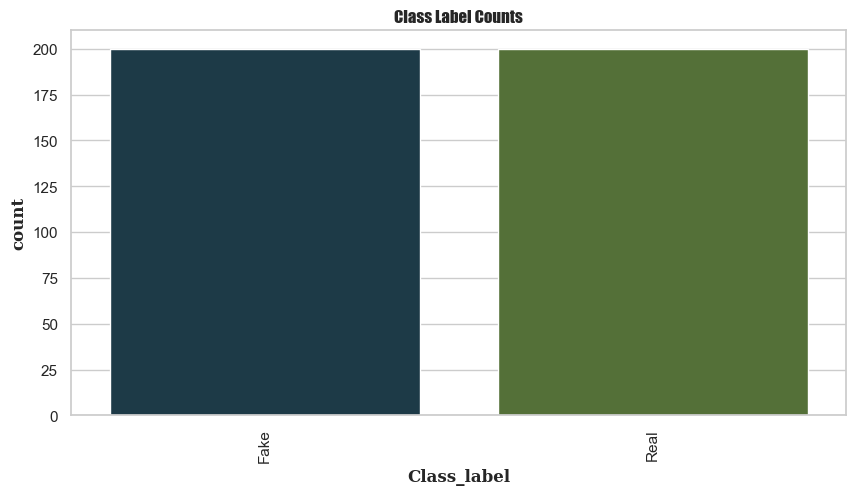

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="class_label", data=df_unsampled, palette=sns.color_palette("cubehelix", 4))
plt.xticks(rotation=90)
plt.title("Class Label Counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Class_label", {"fontname": "serif", "fontweight":"bold"})

In [23]:
def resize_image(img):
    file = cv2.imread(img)
    resized = cv2.resize(file, (224,224), interpolation = cv2.INTER_AREA)
    resized= np.array(resized)
    image = np.reshape(resized,[1,224,224,3])
    return resized

In [24]:
def resize_image(img):
    file = cv2.imread(img)
    print("START")
    print(file)
    print(img)
    print("END")
    resized = cv2.resize(file, (224,224), interpolation = cv2.INTER_AREA)
    resized= np.array(resized)
    image = np.reshape(resized,[1,224,224,3])
    return resized

In [25]:
images=[resize_image(img) for img in data['image_path']]

START
[[[186 217 220]
  [181 212 215]
  [184 215 216]
  ...
  [172 211 209]
  [175 214 212]
  [177 214 212]]

 [[177 208 211]
  [153 184 187]
  [157 188 189]
  ...
  [143 182 180]
  [161 200 198]
  [173 210 208]]

 [[165 196 199]
  [120 151 154]
  [132 166 166]
  ...
  [111 150 148]
  [133 172 170]
  [167 204 202]]

 ...

 [[174 208 207]
  [123 157 156]
  [116 153 151]
  ...
  [138 172 172]
  [131 165 165]
  [168 202 202]]

 [[170 204 203]
  [124 158 157]
  [121 158 156]
  ...
  [143 177 177]
  [133 167 167]
  [171 205 205]]

 [[167 201 200]
  [124 158 157]
  [130 164 163]
  ...
  [147 181 181]
  [135 169 169]
  [174 208 208]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Fake\8f.jpg
END
START
[[[232 229 221]
  [209 206 198]
  [189 186 181]
  ...
  [147 157 157]
  [171 176 177]
  [204 209 208]]

 [[229 226 218]
  [209 206 198]
  [187 184 179]
  ...
  [171 181 181]
  [165 170 171]
  [239 244 243]]

 [[226 220 213]
  [208 205 197]
  [182 179 174]
  ...
  [160 170 170]

START
[[[ 50  55  54]
  [ 49  54  53]
  [ 47  52  51]
  ...
  [209 204 205]
  [210 205 206]
  [210 205 206]]

 [[ 82  87  86]
  [ 81  86  85]
  [ 80  85  84]
  ...
  [209 204 205]
  [210 205 206]
  [210 205 206]]

 [[122 127 126]
  [121 126 125]
  [121 126 125]
  ...
  [209 204 205]
  [210 205 206]
  [210 205 206]]

 ...

 [[137 147 164]
  [138 148 165]
  [143 151 168]
  ...
  [104 110 123]
  [105 111 124]
  [106 112 125]]

 [[139 149 166]
  [141 151 168]
  [146 154 171]
  ...
  [106 112 125]
  [109 115 128]
  [110 116 129]]

 [[140 150 167]
  [142 152 169]
  [147 155 172]
  ...
  [109 115 128]
  [112 118 131]
  [114 120 133]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\2 - Copy (2).jpg
END
START
[[[157 162 161]
  [155 160 159]
  [155 160 159]
  ...
  [129 137 120]
  [128 136 119]
  [135 143 126]]

 [[159 164 163]
  [160 165 164]
  [160 165 164]
  ...
  [122 130 113]
  [119 127 110]
  [125 133 116]]

 [[161 166 165]
  [163 168 167]
  [164 169 168]
  ...
  [11

START
[[[59 57 39]
  [60 58 40]
  [58 55 40]
  ...
  [34 35 19]
  [34 35 19]
  [32 33 17]]

 [[58 56 38]
  [59 57 39]
  [55 52 37]
  ...
  [35 36 20]
  [34 35 19]
  [32 33 17]]

 [[55 52 37]
  [56 53 38]
  [53 50 35]
  ...
  [38 39 23]
  [39 40 24]
  [38 39 23]]

 ...

 [[25 23 12]
  [22 20  9]
  [15 13  2]
  ...
  [ 6 10  5]
  [ 3  7  2]
  [ 0  3  0]]

 [[28 26 15]
  [25 23 12]
  [15 13  2]
  ...
  [ 3  7  2]
  [ 3  7  2]
  [ 3  7  2]]

 [[32 30 19]
  [30 28 17]
  [20 18  7]
  ...
  [ 2  6  1]
  [ 4  8  3]
  [ 6 10  5]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Fake\500_f5.jpg
END
START
[[[201 232 231]
  [183 215 214]
  [188 221 217]
  ...
  [180 222 221]
  [178 220 219]
  [179 221 220]]

 [[176 207 206]
  [144 176 175]
  [153 188 184]
  ...
  [145 187 186]
  [144 186 185]
  [143 185 184]]

 [[167 199 198]
  [117 149 148]
  [130 165 161]
  ...
  [114 156 155]
  [111 153 152]
  [108 150 149]]

 ...

 [[176 208 207]
  [127 159 158]
  [117 151 150]
  ...
  [144 17

START
[[[185 216 219]
  [184 215 218]
  [185 216 219]
  ...
  [104 147 144]
  [ 97 137 135]
  [116 156 154]]

 [[189 220 223]
  [178 209 212]
  [181 212 215]
  ...
  [103 146 143]
  [108 148 146]
  [116 156 154]]

 [[181 212 215]
  [154 185 188]
  [155 189 189]
  ...
  [ 98 141 138]
  [110 150 148]
  [117 156 154]]

 ...

 [[190 221 220]
  [198 229 228]
  [175 207 206]
  ...
  [144 178 177]
  [155 189 188]
  [166 200 199]]

 [[188 219 218]
  [188 219 218]
  [167 199 198]
  ...
  [154 188 187]
  [159 193 192]
  [164 198 197]]

 [[185 216 215]
  [179 210 209]
  [160 192 191]
  ...
  [180 214 213]
  [183 217 216]
  [184 218 217]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Fake\3f.jpg
END
START
[[[195 200 199]
  [195 200 199]
  [195 200 199]
  ...
  [194 186 169]
  [194 186 169]
  [193 185 168]]

 [[195 200 199]
  [195 200 199]
  [195 200 199]
  ...
  [195 187 170]
  [195 187 170]
  [195 187 170]]

 [[195 200 199]
  [195 200 199]
  [195 200 199]
  ...
  [196 188 171]

START
[[[194 186 169]
  [193 185 168]
  [192 184 167]
  ...
  [192 180 168]
  [191 179 167]
  [190 178 166]]

 [[197 189 172]
  [196 188 171]
  [196 188 171]
  ...
  [193 181 169]
  [192 180 168]
  [191 179 167]]

 [[193 185 168]
  [194 186 169]
  [194 186 169]
  ...
  [195 183 171]
  [194 182 170]
  [192 180 168]]

 ...

 [[200 197 199]
  [200 197 199]
  [200 197 199]
  ...
  [194 192 191]
  [195 193 192]
  [196 194 193]]

 [[200 197 199]
  [200 197 199]
  [200 197 199]
  ...
  [195 193 192]
  [196 194 193]
  [197 195 194]]

 [[200 197 199]
  [200 197 199]
  [200 197 199]
  ...
  [194 192 191]
  [196 194 193]
  [196 194 193]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190420_150406750.jpg_5821e24a-9cb8-4f6a-bfa7-38ec90724e35.jpg
END
START
[[[251 255 255]
  [251 255 255]
  [253 255 255]
  ...
  [ 46  33  31]
  [ 46  33  31]
  [ 46  33  31]]

 [[251 255 255]
  [251 255 255]
  [253 255 255]
  ...
  [ 46  33  31]
  [ 46  33  31]
  [ 46  33  3

START
[[[ 66  68  78]
  [ 67  69  79]
  [ 68  70  80]
  ...
  [130 135 144]
  [131 136 145]
  [132 137 146]]

 [[ 71  73  83]
  [ 71  73  83]
  [ 71  73  83]
  ...
  [128 133 142]
  [129 134 143]
  [130 135 144]]

 [[ 74  76  86]
  [ 73  75  85]
  [ 71  73  83]
  ...
  [129 134 143]
  [129 134 143]
  [129 134 143]]

 ...

 [[149 154 155]
  [149 154 155]
  [149 154 155]
  ...
  [140 142 142]
  [141 143 143]
  [142 144 144]]

 [[149 154 155]
  [149 154 155]
  [149 154 155]
  ...
  [140 142 142]
  [141 143 143]
  [142 144 144]]

 [[149 154 155]
  [149 154 155]
  [150 155 156]
  ...
  [139 141 141]
  [141 143 143]
  [141 143 143]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190420_150409233.jpg_4b155095-469f-4da3-b898-c3dff352c2a6.jpg
END
START
[[[109 166 151]
  [106 163 148]
  [103 159 146]
  ...
  [ 45 105  97]
  [ 66 126 118]
  [ 64 127 117]]

 [[116 172 159]
  [107 163 150]
  [ 96 152 139]
  ...
  [ 24  84  76]
  [ 37  98  88]
  [ 41 102  9

START
[[[  3   7  18]
  [  6  10  21]
  [  7  12  21]
  ...
  [124 126 126]
  [123 125 125]
  [123 125 125]]

 [[  7  11  22]
  [  8  12  23]
  [  7  12  21]
  ...
  [123 125 125]
  [119 121 121]
  [116 118 118]]

 [[ 11  15  26]
  [  9  13  24]
  [  6  11  20]
  ...
  [120 122 122]
  [116 118 118]
  [112 114 114]]

 ...

 [[153 102  22]
  [139  88   8]
  [133  82   2]
  ...
  [114 111 120]
  [113 110 119]
  [107 104 113]]

 [[153 102  22]
  [145  94  14]
  [139  88   8]
  ...
  [113 110 119]
  [112 109 118]
  [108 105 114]]

 [[144  93  13]
  [144  93  13]
  [141  90  10]
  ...
  [111 108 117]
  [111 108 117]
  [108 105 114]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190420_083826229.jpg_dbb936f1-7734-46cc-a638-b29510803329.jpg
END
START
[[[ 50  55  54]
  [ 49  54  53]
  [ 47  52  51]
  ...
  [209 204 205]
  [210 205 206]
  [210 205 206]]

 [[ 82  87  86]
  [ 81  86  85]
  [ 80  85  84]
  ...
  [209 204 205]
  [210 205 206]
  [210 205 20

START
[[[209 200 196]
  [209 200 196]
  [209 200 196]
  ...
  [185 181 180]
  [185 181 180]
  [185 181 180]]

 [[208 199 195]
  [208 199 195]
  [208 199 195]
  ...
  [186 182 181]
  [185 181 180]
  [185 181 180]]

 [[206 197 193]
  [206 197 193]
  [207 198 194]
  ...
  [186 182 181]
  [186 182 181]
  [186 182 181]]

 ...

 [[ 73  74  88]
  [ 74  75  89]
  [ 72  73  87]
  ...
  [  5   8  13]
  [  4   7  12]
  [  5   8  13]]

 [[ 78  79  93]
  [ 81  82  96]
  [ 80  81  95]
  ...
  [  4   7  12]
  [  3   6  10]
  [  6   9  13]]

 [[ 68  69  83]
  [ 74  75  89]
  [ 75  76  90]
  ...
  [  4   7  12]
  [  2   5   9]
  [  7  10  14]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190420_150404333.jpg_ade40f80-5b7f-40c0-87eb-282c2ce68825.jpg
END
START
[[[ 55  83 107]
  [ 56  84 108]
  [ 57  85 109]
  ...
  [140 134 135]
  [ 93  87  88]
  [106 100 101]]

 [[ 56  84 108]
  [ 57  85 109]
  [ 58  86 110]
  ...
  [137 131 132]
  [114 108 109]
  [108 102 10

START
[[[126 118 119]
  [125 117 118]
  [124 116 117]
  ...
  [ 87 115 145]
  [ 88 118 147]
  [ 90 120 149]]

 [[128 120 121]
  [127 119 120]
  [127 119 120]
  ...
  [ 83 111 141]
  [ 80 108 138]
  [ 76 106 135]]

 [[128 120 121]
  [129 121 122]
  [128 122 123]
  ...
  [ 93 119 149]
  [ 91 117 147]
  [ 88 116 146]]

 ...

 [[171 169 175]
  [173 171 177]
  [174 172 178]
  ...
  [137  68   0]
  [140  70   3]
  [142  72   5]]

 [[172 170 176]
  [173 171 177]
  [175 173 179]
  ...
  [132  62   0]
  [135  65   0]
  [138  68   1]]

 [[173 171 177]
  [174 172 178]
  [175 173 179]
  ...
  [129  59   0]
  [132  62   0]
  [136  66   0]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190420_083818984.jpg_3a70bdde-4443-4542-b515-714f573f1b55.jpg
END
START
[[[ 50  55  54]
  [ 49  54  53]
  [ 47  52  51]
  ...
  [209 204 205]
  [210 205 206]
  [210 205 206]]

 [[ 82  87  86]
  [ 81  86  85]
  [ 80  85  84]
  ...
  [209 204 205]
  [210 205 206]
  [210 205 20

START
[[[145 157 157]
  [ 93 105 105]
  [ 98 112 111]
  ...
  [105 120 129]
  [132 143 151]
  [141 152 160]]

 [[149 161 161]
  [102 114 114]
  [ 98 110 110]
  ...
  [100 115 124]
  [154 165 173]
  [107 118 126]]

 [[146 156 156]
  [134 146 146]
  [107 120 118]
  ...
  [134 149 158]
  [150 160 170]
  [ 97 107 117]]

 ...

 [[145 155 155]
  [165 175 182]
  [146 160 179]
  ...
  [124 134 152]
  [134 141 156]
  [139 144 159]]

 [[142 150 150]
  [149 158 167]
  [152 160 183]
  ...
  [117 130 146]
  [142 149 164]
  [150 156 169]]

 [[169 177 177]
  [164 171 180]
  [144 152 175]
  ...
  [119 132 146]
  [138 145 160]
  [145 151 164]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Fake\500_f6.jpg
END
START
[[[186 215 219]
  [193 222 226]
  [175 206 209]
  ...
  [177 217 215]
  [175 215 213]
  [174 213 211]]

 [[187 216 220]
  [175 204 208]
  [153 184 187]
  ...
  [144 184 182]
  [145 185 183]
  [155 194 192]]

 [[197 226 230]
  [162 191 195]
  [123 154 157]
  ...
  [111 151 

START
[[[ 26  36  66]
  [ 24  34  64]
  [ 23  33  63]
  ...
  [124 117 120]
  [122 115 118]
  [126 119 122]]

 [[ 42  52  82]
  [ 38  48  78]
  [ 34  44  74]
  ...
  [127 120 123]
  [125 118 121]
  [128 121 124]]

 [[ 37  47  77]
  [ 34  44  74]
  [ 31  41  71]
  ...
  [123 118 120]
  [121 116 118]
  [122 117 119]]

 ...

 [[168 114  20]
  [166 112  18]
  [162 108  14]
  ...
  [174 169 171]
  [173 168 170]
  [173 168 170]]

 [[169 115  21]
  [167 113  19]
  [163 109  15]
  ...
  [174 169 171]
  [173 168 170]
  [172 167 169]]

 [[169 115  21]
  [167 113  19]
  [163 109  15]
  ...
  [174 169 171]
  [173 168 170]
  [172 167 169]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190420_083830966.jpg_8cdb94b4-6316-4b8d-8752-f34051655f8e.jpg
END
START
[[[112  66   2]
  [111  65   1]
  [112  64   0]
  ...
  [ 24  30  53]
  [ 24  30  53]
  [ 23  29  52]]

 [[111  65   1]
  [112  66   2]
  [114  66   2]
  ...
  [ 24  30  53]
  [ 24  30  53]
  [ 24  30  5

START
[[[139 132 117]
  [131 124 109]
  [156 149 134]
  ...
  [ 66  72  95]
  [ 64  70  93]
  [ 61  67  90]]

 [[168 161 146]
  [138 131 116]
  [144 137 122]
  ...
  [ 60  66  89]
  [ 60  66  89]
  [ 58  64  87]]

 [[139 132 117]
  [131 124 109]
  [151 144 129]
  ...
  [ 57  66  86]
  [ 57  66  86]
  [ 57  66  86]]

 ...

 [[190 188 180]
  [194 192 184]
  [201 199 191]
  ...
  [  7  16  50]
  [  7  16  50]
  [  7  16  50]]

 [[191 189 181]
  [193 191 183]
  [199 197 189]
  ...
  [  7  16  50]
  [  7  16  50]
  [  7  16  50]]

 [[191 189 181]
  [193 191 183]
  [199 197 189]
  ...
  [  7  16  50]
  [  7  16  50]
  [  7  16  50]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190420_150429637.jpg_14865967-8edc-405f-aafa-5bcc74e4bff8.jpg
END
START
[[[233 230 222]
  [208 205 197]
  [189 186 181]
  ...
  [144 154 154]
  [165 170 171]
  [196 201 200]]

 [[229 226 218]
  [208 205 197]
  [186 183 178]
  ...
  [179 189 189]
  [176 181 182]
  [251 255 25

START
[[[28 31 29]
  [28 31 29]
  [28 31 29]
  ...
  [35 35 35]
  [35 35 35]
  [35 35 35]]

 [[29 32 30]
  [29 32 30]
  [29 32 30]
  ...
  [36 36 36]
  [36 36 36]
  [36 36 36]]

 [[30 33 31]
  [30 33 31]
  [30 33 31]
  ...
  [37 37 37]
  [37 37 37]
  [37 37 37]]

 ...

 [[73 77 72]
  [73 77 72]
  [73 77 72]
  ...
  [65 69 64]
  [65 69 64]
  [65 69 64]]

 [[78 82 77]
  [78 82 77]
  [78 82 77]
  ...
  [67 71 66]
  [67 71 66]
  [67 71 66]]

 [[75 79 74]
  [75 79 74]
  [75 79 74]
  ...
  [64 68 63]
  [64 68 63]
  [64 68 63]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Fake\72.jpg
END
START
[[[202 208 203]
  [202 208 203]
  [202 208 203]
  ...
  [196 201 200]
  [196 201 200]
  [196 201 200]]

 [[202 208 203]
  [202 208 203]
  [202 208 203]
  ...
  [198 203 202]
  [199 204 203]
  [199 204 203]]

 [[202 208 203]
  [202 208 203]
  [203 209 204]
  ...
  [197 202 201]
  [197 202 201]
  [198 203 202]]

 ...

 [[199 199 199]
  [199 199 199]
  [201 199 199]
  ...
  [180 185 18

START
[[[128 131 135]
  [125 128 132]
  [122 126 127]
  ...
  [158 163 161]
  [159 164 162]
  [159 164 162]]

 [[126 129 133]
  [129 132 136]
  [126 130 131]
  ...
  [158 163 161]
  [159 164 162]
  [159 164 162]]

 [[125 128 132]
  [134 137 141]
  [128 132 133]
  ...
  [158 163 161]
  [158 163 161]
  [159 164 162]]

 ...

 [[146 148 148]
  [143 145 145]
  [150 152 152]
  ...
  [160 165 164]
  [160 165 164]
  [160 165 164]]

 [[151 153 153]
  [145 147 147]
  [148 150 150]
  ...
  [160 165 164]
  [160 165 164]
  [160 165 164]]

 [[153 155 155]
  [148 150 150]
  [148 150 150]
  ...
  [159 164 163]
  [160 165 164]
  [160 165 164]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190419_211901192.jpg_4e204216-2d57-405c-95bf-1ec1d134f962.jpg
END
START
[[[29 32 30]
  [29 32 30]
  [29 32 30]
  ...
  [35 35 35]
  [35 35 35]
  [35 35 35]]

 [[29 32 30]
  [29 32 30]
  [29 32 30]
  ...
  [36 36 36]
  [36 36 36]
  [36 36 36]]

 [[30 33 31]
  [30 33 31]
  [30

START
[[[194 183 175]
  [195 184 176]
  [197 186 178]
  ...
  [198 188 171]
  [197 187 170]
  [196 186 169]]

 [[193 182 174]
  [195 184 176]
  [197 186 178]
  ...
  [197 187 170]
  [196 186 169]
  [195 185 168]]

 [[193 182 174]
  [194 183 175]
  [196 185 177]
  ...
  [197 187 170]
  [195 185 168]
  [194 184 167]]

 ...

 [[196 198 192]
  [195 197 191]
  [193 195 189]
  ...
  [ 16  16  10]
  [ 19  17   9]
  [ 20  19   9]]

 [[197 199 193]
  [196 198 192]
  [194 196 190]
  ...
  [ 15  15   9]
  [ 17  16   6]
  [ 18  18   6]]

 [[198 200 194]
  [197 199 193]
  [195 197 191]
  ...
  [ 15  16   7]
  [ 16  15   5]
  [ 17  17   5]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190420_150414877.jpg_eddca907-e059-47b6-8dd9-6738ef177a91.jpg
END
START
[[[251 255 255]
  [251 255 255]
  [253 255 255]
  ...
  [ 46  33  31]
  [ 46  33  31]
  [ 46  33  31]]

 [[251 255 255]
  [251 255 255]
  [253 255 255]
  ...
  [ 46  33  31]
  [ 46  33  31]
  [ 46  33  3

START
[[[102 104 104]
  [102 104 104]
  [104 106 106]
  ...
  [159 162 167]
  [160 163 168]
  [160 163 168]]

 [[101 103 103]
  [102 104 104]
  [103 105 105]
  ...
  [159 162 167]
  [160 163 168]
  [160 163 168]]

 [[101 103 103]
  [101 103 103]
  [103 105 105]
  ...
  [159 162 167]
  [159 162 167]
  [160 163 168]]

 ...

 [[ 62  72  72]
  [ 65  75  75]
  [ 62  70  69]
  ...
  [122  78   7]
  [122  78   7]
  [122  78   7]]

 [[ 59  71  71]
  [ 64  74  74]
  [ 63  71  70]
  ...
  [121  77   6]
  [122  78   7]
  [122  78   7]]

 [[ 60  72  72]
  [ 62  74  74]
  [ 63  71  70]
  ...
  [121  77   6]
  [121  77   6]
  [121  77   6]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190420_083813593.jpg_8664088f-9d8d-4d40-8678-61fd8a0c97ba.jpg
END
START
[[[145 149 143]
  [144 148 142]
  [144 148 142]
  ...
  [143 145 145]
  [135 137 137]
  [134 136 136]]

 [[145 149 143]
  [144 148 142]
  [143 147 141]
  ...
  [144 146 146]
  [133 135 135]
  [119 121 12

START
[[[ 56  87 110]
  [ 52  83 106]
  [ 49  80 103]
  ...
  [ 80 114 138]
  [ 80 116 140]
  [ 81 117 141]]

 [[ 57  88 111]
  [ 53  84 107]
  [ 50  81 104]
  ...
  [ 81 115 139]
  [ 81 117 141]
  [ 82 118 142]]

 [[ 58  89 112]
  [ 54  85 108]
  [ 51  82 105]
  ...
  [ 82 116 140]
  [ 81 117 141]
  [ 82 118 142]]

 ...

 [[134 131 110]
  [196 193 172]
  [185 182 161]
  ...
  [128 123 122]
  [138 133 132]
  [150 145 144]]

 [[124 122  98]
  [156 154 130]
  [129 127 103]
  ...
  [126 120 121]
  [147 141 142]
  [173 167 168]]

 [[114 112  88]
  [110 108  84]
  [131 129 105]
  ...
  [109 103 104]
  [126 120 121]
  [151 145 146]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190420_150421282.jpg_400a3eb1-9603-4f56-a049-bd83a2b521f2.jpg
END
START
[[[255 255 255]
  [255 255 255]
  [187 187 187]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [187 187 187]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 25

START
[[[126 118 119]
  [125 117 118]
  [124 116 117]
  ...
  [ 87 115 145]
  [ 88 118 147]
  [ 90 120 149]]

 [[128 120 121]
  [127 119 120]
  [127 119 120]
  ...
  [ 83 111 141]
  [ 80 108 138]
  [ 76 106 135]]

 [[128 120 121]
  [129 121 122]
  [128 122 123]
  ...
  [ 93 119 149]
  [ 91 117 147]
  [ 88 116 146]]

 ...

 [[171 169 175]
  [173 171 177]
  [174 172 178]
  ...
  [137  68   0]
  [140  70   3]
  [142  72   5]]

 [[172 170 176]
  [173 171 177]
  [175 173 179]
  ...
  [132  62   0]
  [135  65   0]
  [138  68   1]]

 [[173 171 177]
  [174 172 178]
  [175 173 179]
  ...
  [129  59   0]
  [132  62   0]
  [136  66   0]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190420_083818984.jpg_3a70bdde-4443-4542-b515-714f573f1b55.jpg
END
START
[[[186 217 220]
  [181 212 215]
  [184 215 216]
  ...
  [172 211 209]
  [175 214 212]
  [177 214 212]]

 [[177 208 211]
  [153 184 187]
  [157 188 189]
  ...
  [143 182 180]
  [161 200 198]
  [173 210 20

START
[[[155 151 156]
  [156 152 157]
  [157 153 158]
  ...
  [ 91  90 106]
  [ 90  89 105]
  [ 81  80  96]]

 [[159 155 160]
  [160 156 161]
  [160 156 161]
  ...
  [ 84  83  99]
  [ 83  82  98]
  [ 77  76  92]]

 [[163 160 162]
  [163 160 162]
  [163 160 162]
  ...
  [ 79  78  94]
  [ 78  77  93]
  [ 75  74  90]]

 ...

 [[168 167 163]
  [168 167 163]
  [168 167 163]
  ...
  [  5   7  15]
  [  5   6  16]
  [  6   7  17]]

 [[164 163 159]
  [165 164 160]
  [166 165 161]
  ...
  [  5   7  15]
  [  5   6  16]
  [  5   6  16]]

 [[161 160 156]
  [162 161 157]
  [165 164 160]
  ...
  [  7   9  17]
  [  7   8  18]
  [  6   7  17]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190420_150404333.jpg_3caefa9b-d84d-48d1-971b-e951759587c5.jpg
END
START
[[[ 19  26  53]
  [ 22  28  57]
  [ 26  31  62]
  ...
  [210 217 214]
  [207 215 214]
  [206 214 213]]

 [[ 10  17  44]
  [ 16  22  51]
  [ 20  25  56]
  ...
  [209 216 213]
  [206 214 213]
  [205 213 21

START
[[[163 164 168]
  [163 164 168]
  [163 164 168]
  ...
  [145 150 148]
  [145 150 148]
  [145 150 148]]

 [[165 166 170]
  [165 166 170]
  [164 165 169]
  ...
  [145 150 148]
  [144 149 147]
  [145 150 148]]

 [[168 169 173]
  [168 169 173]
  [167 168 172]
  ...
  [145 150 148]
  [143 148 146]
  [146 151 149]]

 ...

 [[158 164 163]
  [158 164 163]
  [158 164 163]
  ...
  [109 115 110]
  [ 96 103  96]
  [111 118 111]]

 [[164 170 169]
  [164 170 169]
  [163 169 168]
  ...
  [114 120 115]
  [107 114 107]
  [118 125 118]]

 [[166 172 171]
  [165 171 170]
  [164 170 169]
  ...
  [121 127 122]
  [117 124 117]
  [121 128 121]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190419_211814969.jpg_e306a4a2-0f79-4e5c-82e5-68f591f5158b.jpg
END
START
[[[35 51 58]
  [32 48 55]
  [36 52 59]
  ...
  [38 40 50]
  [32 41 50]
  [31 42 50]]

 [[44 60 67]
  [39 55 62]
  [38 54 61]
  ...
  [47 49 59]
  [35 44 53]
  [34 45 53]]

 [[43 62 67]
  [41 60 65]
  [37

START
[[[209 200 196]
  [209 200 196]
  [209 200 196]
  ...
  [185 181 180]
  [185 181 180]
  [185 181 180]]

 [[208 199 195]
  [208 199 195]
  [208 199 195]
  ...
  [186 182 181]
  [185 181 180]
  [185 181 180]]

 [[206 197 193]
  [206 197 193]
  [207 198 194]
  ...
  [186 182 181]
  [186 182 181]
  [186 182 181]]

 ...

 [[ 73  74  88]
  [ 74  75  89]
  [ 72  73  87]
  ...
  [  5   8  13]
  [  4   7  12]
  [  5   8  13]]

 [[ 78  79  93]
  [ 81  82  96]
  [ 80  81  95]
  ...
  [  4   7  12]
  [  3   6  10]
  [  6   9  13]]

 [[ 68  69  83]
  [ 74  75  89]
  [ 75  76  90]
  ...
  [  4   7  12]
  [  2   5   9]
  [  7  10  14]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190420_150404333.jpg_ade40f80-5b7f-40c0-87eb-282c2ce68825.jpg
END
START
[[[28 31 29]
  [28 31 29]
  [28 31 29]
  ...
  [35 35 35]
  [35 35 35]
  [35 35 35]]

 [[29 32 30]
  [29 32 30]
  [29 32 30]
  ...
  [36 36 36]
  [36 36 36]
  [36 36 36]]

 [[30 33 31]
  [30 33 31]
  [30

START
[[[114 116 117]
  [115 117 118]
  [115 117 118]
  ...
  [108 107 109]
  [106 105 107]
  [103 102 104]]

 [[116 118 119]
  [116 118 119]
  [116 118 119]
  ...
  [108 107 109]
  [106 105 107]
  [104 103 105]]

 [[118 120 121]
  [118 120 121]
  [118 120 121]
  ...
  [109 108 110]
  [108 107 109]
  [106 105 107]]

 ...

 [[122  70   0]
  [122  70   0]
  [121  69   0]
  ...
  [ 92  95  93]
  [ 94  97  95]
  [ 96  99  97]]

 [[121  69   0]
  [121  69   0]
  [121  69   0]
  ...
  [ 91  94  92]
  [ 93  96  94]
  [ 96  99  97]]

 [[120  68   0]
  [120  68   0]
  [120  68   0]
  ...
  [ 90  93  91]
  [ 93  96  94]
  [ 96  99  97]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190420_083813593.jpg_7dd18b9c-9e65-436b-8149-4eacfbe7eb68.jpg
END
START
[[[223 222 224]
  [229 228 230]
  [224 226 227]
  ...
  [ 78  94  93]
  [ 20  36  35]
  [ 28  41  43]]

 [[224 223 225]
  [230 229 231]
  [223 225 226]
  ...
  [ 85 101 100]
  [ 27  43  42]
  [ 22  35  3

START
[[[223 219 225]
  [224 220 226]
  [224 220 225]
  ...
  [188 185 187]
  [188 185 187]
  [188 185 187]]

 [[223 219 225]
  [224 220 226]
  [224 220 225]
  ...
  [188 185 187]
  [188 185 187]
  [188 185 187]]

 [[223 219 225]
  [224 220 226]
  [225 221 226]
  ...
  [188 185 187]
  [188 185 187]
  [187 184 186]]

 ...

 [[ 25  69 128]
  [ 26  72 130]
  [ 28  76 134]
  ...
  [ 11  10   6]
  [ 13  10   5]
  [ 14  11   6]]

 [[ 24  70 128]
  [ 25  73 131]
  [ 29  79 137]
  ...
  [  7   7   1]
  [  9   6   1]
  [ 10   7   2]]

 [[ 25  71 129]
  [ 27  75 133]
  [ 32  82 140]
  ...
  [  7   7   1]
  [ 10   7   2]
  [ 11   8   3]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\IMG_20180120_122443_HDR.jpg
END
START
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [237 234 226]
  [234 231 223]
  [234 231 223]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [237 234 226]
  [235 232 224]
  [235 232 224]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]


START
[[[59 57 39]
  [60 58 40]
  [58 55 40]
  ...
  [34 35 19]
  [34 35 19]
  [32 33 17]]

 [[58 56 38]
  [59 57 39]
  [55 52 37]
  ...
  [35 36 20]
  [34 35 19]
  [32 33 17]]

 [[55 52 37]
  [56 53 38]
  [53 50 35]
  ...
  [38 39 23]
  [39 40 24]
  [38 39 23]]

 ...

 [[25 23 12]
  [22 20  9]
  [15 13  2]
  ...
  [ 6 10  5]
  [ 3  7  2]
  [ 0  3  0]]

 [[28 26 15]
  [25 23 12]
  [15 13  2]
  ...
  [ 3  7  2]
  [ 3  7  2]
  [ 3  7  2]]

 [[32 30 19]
  [30 28 17]
  [20 18  7]
  ...
  [ 2  6  1]
  [ 4  8  3]
  [ 6 10  5]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Fake\500_f5.jpg
END
START
[[[29 32 30]
  [29 32 30]
  [29 32 30]
  ...
  [35 35 35]
  [35 35 35]
  [35 35 35]]

 [[29 32 30]
  [29 32 30]
  [29 32 30]
  ...
  [36 36 36]
  [36 36 36]
  [36 36 36]]

 [[30 33 31]
  [30 33 31]
  [30 33 31]
  ...
  [37 37 37]
  [37 37 37]
  [37 37 37]]

 ...

 [[74 78 73]
  [74 78 73]
  [74 78 73]
  ...
  [66 70 65]
  [66 70 65]
  [66 70 65]]

 [[80 84 79]
  [80 84 79]
  [80

START
[[[ 66  68  78]
  [ 67  69  79]
  [ 68  70  80]
  ...
  [130 135 144]
  [131 136 145]
  [132 137 146]]

 [[ 71  73  83]
  [ 71  73  83]
  [ 71  73  83]
  ...
  [128 133 142]
  [129 134 143]
  [130 135 144]]

 [[ 74  76  86]
  [ 73  75  85]
  [ 71  73  83]
  ...
  [129 134 143]
  [129 134 143]
  [129 134 143]]

 ...

 [[149 154 155]
  [149 154 155]
  [149 154 155]
  ...
  [140 142 142]
  [141 143 143]
  [142 144 144]]

 [[149 154 155]
  [149 154 155]
  [149 154 155]
  ...
  [140 142 142]
  [141 143 143]
  [142 144 144]]

 [[149 154 155]
  [149 154 155]
  [150 155 156]
  ...
  [139 141 141]
  [141 143 143]
  [141 143 143]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190420_150409233.jpg_4b155095-469f-4da3-b898-c3dff352c2a6.jpg
END
START
[[[109 166 151]
  [106 163 148]
  [103 159 146]
  ...
  [ 45 105  97]
  [ 66 126 118]
  [ 64 127 117]]

 [[116 172 159]
  [107 163 150]
  [ 96 152 139]
  ...
  [ 24  84  76]
  [ 37  98  88]
  [ 41 102  9

START
[[[161 157 162]
  [160 156 161]
  [160 156 161]
  ...
  [111 109 109]
  [112 107 108]
  [111 106 107]]

 [[162 158 163]
  [161 157 162]
  [160 156 161]
  ...
  [112 110 110]
  [112 107 108]
  [111 106 107]]

 [[163 159 164]
  [162 158 163]
  [160 156 161]
  ...
  [112 110 110]
  [112 107 108]
  [110 105 106]]

 ...

 [[114  63   0]
  [118  67   4]
  [123  72   9]
  ...
  [ 74  76  77]
  [ 72  74  75]
  [ 73  75  76]]

 [[115  64   2]
  [116  65   3]
  [117  66   3]
  ...
  [ 76  78  79]
  [ 71  73  74]
  [ 70  72  73]]

 [[115  64   2]
  [114  63   1]
  [113  62   0]
  ...
  [ 71  73  74]
  [ 67  69  70]
  [ 73  75  76]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190420_083813593.jpg_a1c12ada-385d-46e2-9844-a6674b72d997.jpg
END
START
[[[109 166 151]
  [106 163 148]
  [103 159 146]
  ...
  [ 45 105  97]
  [ 66 126 118]
  [ 64 127 117]]

 [[116 172 159]
  [107 163 150]
  [ 96 152 139]
  ...
  [ 24  84  76]
  [ 37  98  88]
  [ 41 102  9

START
[[[120 111 121]
  [176 167 177]
  [226 218 225]
  ...
  [117 111 112]
  [111 105 106]
  [105  99 100]]

 [[102  93 103]
  [148 140 147]
  [190 182 189]
  ...
  [109 103 104]
  [102  96  97]
  [104  98  99]]

 [[ 92  84  91]
  [124 116 123]
  [156 148 155]
  ...
  [103  97  98]
  [101  95  96]
  [118 112 113]]

 ...

 [[125 124  98]
  [123 122  96]
  [118 117  91]
  ...
  [ 48  79 104]
  [ 46  80 104]
  [ 50  84 108]]

 [[ 97  96  70]
  [114 113  87]
  [124 123  97]
  ...
  [ 47  81 105]
  [ 47  81 105]
  [ 50  84 108]]

 [[ 98  97  71]
  [121 120  94]
  [132 131 105]
  ...
  [ 47  81 105]
  [ 47  81 105]
  [ 51  85 109]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190420_150421282.jpg_816d21a4-871a-4c91-ac30-bebce8271866.jpg
END
START
[[[255 251 250]
  [251 247 246]
  [254 250 249]
  ...
  [246 246 246]
  [243 243 243]
  [255 255 255]]

 [[255 254 255]
  [228 224 223]
  [211 206 207]
  ...
  [229 229 229]
  [225 225 225]
  [243 243 24

START
[[[166 166 166]
  [166 166 166]
  [165 165 165]
  ...
  [156 161 160]
  [156 161 160]
  [157 162 161]]

 [[166 166 166]
  [165 165 165]
  [165 165 165]
  ...
  [156 161 160]
  [156 161 160]
  [157 162 161]]

 [[164 164 164]
  [164 164 164]
  [164 164 164]
  ...
  [156 161 160]
  [156 161 160]
  [157 162 161]]

 ...

 [[141 143 143]
  [143 145 145]
  [146 148 148]
  ...
  [121 123 123]
  [117 119 119]
  [114 116 116]]

 [[144 146 146]
  [146 148 148]
  [148 150 150]
  ...
  [117 119 119]
  [117 119 119]
  [116 118 118]]

 [[145 147 147]
  [146 148 148]
  [148 150 150]
  ...
  [119 121 121]
  [120 122 122]
  [120 122 122]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190419_211822335.jpg_06b935e9-cc0b-4d0a-8953-992872dbd9be.jpg
END
START
[[[182 213 214]
  [186 217 218]
  [182 216 216]
  ...
  [182 218 218]
  [176 212 212]
  [178 214 214]]

 [[183 214 215]
  [192 223 224]
  [178 212 212]
  ...
  [177 213 213]
  [173 209 209]
  [179 215 21

START
[[[139 147 130]
  [124 132 115]
  [115 123 106]
  ...
  [120 118 137]
  [118 116 136]
  [113 111 131]]

 [[134 142 125]
  [123 131 114]
  [117 125 108]
  ...
  [113 111 130]
  [111 109 129]
  [106 104 124]]

 [[128 136 119]
  [123 131 114]
  [117 125 108]
  ...
  [108 107 123]
  [106 104 123]
  [101  99 118]]

 ...

 [[149 150 160]
  [154 155 165]
  [157 159 167]
  ...
  [133 138 137]
  [127 132 131]
  [122 127 126]]

 [[152 153 163]
  [157 158 168]
  [159 160 170]
  ...
  [137 142 141]
  [135 140 139]
  [133 138 137]]

 [[154 155 165]
  [160 161 171]
  [161 162 172]
  ...
  [141 146 145]
  [142 147 146]
  [144 149 148]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190419_211855317.jpg_8b01a356-0048-4b11-a6b6-e6dd626019f8.jpg
END
START
[[[163 164 168]
  [163 164 168]
  [163 164 168]
  ...
  [145 150 148]
  [145 150 148]
  [145 150 148]]

 [[165 166 170]
  [165 166 170]
  [164 165 169]
  ...
  [145 150 148]
  [144 149 147]
  [145 150 14

In [26]:
images = []
for i in data['image_path']:
    file_name, file_extension = os.path.splitext(i)
    if file_extension == '.db':
        print(file_name)
    else:
        app = resize_image(i)
        images.append(app)

START
[[[186 217 220]
  [181 212 215]
  [184 215 216]
  ...
  [172 211 209]
  [175 214 212]
  [177 214 212]]

 [[177 208 211]
  [153 184 187]
  [157 188 189]
  ...
  [143 182 180]
  [161 200 198]
  [173 210 208]]

 [[165 196 199]
  [120 151 154]
  [132 166 166]
  ...
  [111 150 148]
  [133 172 170]
  [167 204 202]]

 ...

 [[174 208 207]
  [123 157 156]
  [116 153 151]
  ...
  [138 172 172]
  [131 165 165]
  [168 202 202]]

 [[170 204 203]
  [124 158 157]
  [121 158 156]
  ...
  [143 177 177]
  [133 167 167]
  [171 205 205]]

 [[167 201 200]
  [124 158 157]
  [130 164 163]
  ...
  [147 181 181]
  [135 169 169]
  [174 208 208]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Fake\8f.jpg
END
START
[[[232 229 221]
  [209 206 198]
  [189 186 181]
  ...
  [147 157 157]
  [171 176 177]
  [204 209 208]]

 [[229 226 218]
  [209 206 198]
  [187 184 179]
  ...
  [171 181 181]
  [165 170 171]
  [239 244 243]]

 [[226 220 213]
  [208 205 197]
  [182 179 174]
  ...
  [160 170 170]

START
[[[157 162 161]
  [155 160 159]
  [155 160 159]
  ...
  [129 137 120]
  [128 136 119]
  [135 143 126]]

 [[159 164 163]
  [160 165 164]
  [160 165 164]
  ...
  [122 130 113]
  [119 127 110]
  [125 133 116]]

 [[161 166 165]
  [163 168 167]
  [164 169 168]
  ...
  [118 126 109]
  [111 119 102]
  [114 122 105]]

 ...

 [[144 149 148]
  [138 143 142]
  [136 141 140]
  ...
  [109 108 124]
  [111 109 128]
  [115 113 132]]

 [[145 150 149]
  [139 144 143]
  [135 140 139]
  ...
  [107 106 122]
  [111 109 128]
  [115 113 133]]

 [[145 150 149]
  [138 143 142]
  [135 140 139]
  ...
  [104 103 119]
  [108 106 126]
  [113 111 131]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190419_211855317.jpg_5f50ab4c-8ec9-4c9d-b801-d5a6d9a08d69.jpg
END
START
[[[222 190 177]
  [222 190 177]
  [222 190 177]
  ...
  [100  91  88]
  [ 96  91  88]
  [ 97  92  89]]

 [[222 190 177]
  [222 190 177]
  [222 190 177]
  ...
  [111 100  96]
  [107  98  95]
  [103  94  9

START
[[[145 149 143]
  [144 148 142]
  [144 148 142]
  ...
  [143 145 145]
  [135 137 137]
  [134 136 136]]

 [[145 149 143]
  [144 148 142]
  [143 147 141]
  ...
  [144 146 146]
  [133 135 135]
  [119 121 121]]

 [[146 150 144]
  [145 149 143]
  [143 147 141]
  ...
  [146 148 148]
  [135 137 137]
  [109 111 111]]

 ...

 [[151 156 154]
  [150 155 153]
  [149 154 152]
  ...
  [155 160 159]
  [156 161 160]
  [157 162 161]]

 [[148 153 151]
  [147 152 150]
  [147 152 150]
  ...
  [156 161 160]
  [156 161 160]
  [157 162 161]]

 [[144 149 147]
  [144 149 147]
  [145 150 148]
  ...
  [156 161 160]
  [156 161 160]
  [156 161 160]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190419_211814969.jpg_c0b3e24a-864c-41a8-94d1-a23e72fcef7c (1).jpg
END
START
[[[59 57 39]
  [60 58 40]
  [58 55 40]
  ...
  [34 35 19]
  [34 35 19]
  [32 33 17]]

 [[58 56 38]
  [59 57 39]
  [55 52 37]
  ...
  [35 36 20]
  [34 35 19]
  [32 33 17]]

 [[55 52 37]
  [56 53 38]
 

START
[[[28 31 29]
  [28 31 29]
  [28 31 29]
  ...
  [35 35 35]
  [35 35 35]
  [35 35 35]]

 [[29 32 30]
  [29 32 30]
  [29 32 30]
  ...
  [36 36 36]
  [36 36 36]
  [36 36 36]]

 [[30 33 31]
  [30 33 31]
  [30 33 31]
  ...
  [37 37 37]
  [37 37 37]
  [37 37 37]]

 ...

 [[73 77 72]
  [73 77 72]
  [73 77 72]
  ...
  [65 69 64]
  [65 69 64]
  [65 69 64]]

 [[78 82 77]
  [78 82 77]
  [78 82 77]
  ...
  [67 71 66]
  [67 71 66]
  [67 71 66]]

 [[75 79 74]
  [75 79 74]
  [75 79 74]
  ...
  [64 68 63]
  [64 68 63]
  [64 68 63]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Fake\72.jpg
END
START
[[[126 118 119]
  [125 117 118]
  [124 116 117]
  ...
  [ 87 115 145]
  [ 88 118 147]
  [ 90 120 149]]

 [[128 120 121]
  [127 119 120]
  [127 119 120]
  ...
  [ 83 111 141]
  [ 80 108 138]
  [ 76 106 135]]

 [[128 120 121]
  [129 121 122]
  [128 122 123]
  ...
  [ 93 119 149]
  [ 91 117 147]
  [ 88 116 146]]

 ...

 [[171 169 175]
  [173 171 177]
  [174 172 178]
  ...
  [137  68   

START
[[[168 170 170]
  [169 171 171]
  [168 170 170]
  ...
  [130 138 128]
  [127 135 125]
  [128 136 126]]

 [[168 170 170]
  [169 171 171]
  [169 171 171]
  ...
  [132 140 130]
  [134 142 132]
  [133 141 131]]

 [[167 169 169]
  [169 171 171]
  [170 172 172]
  ...
  [132 140 130]
  [137 145 135]
  [136 144 134]]

 ...

 [[160 165 164]
  [159 164 163]
  [156 161 160]
  ...
  [102 107  86]
  [ 89  95  70]
  [ 79  86  59]]

 [[160 165 164]
  [158 163 162]
  [155 160 159]
  ...
  [106 112  87]
  [107 115  84]
  [106 115  82]]

 [[162 167 166]
  [159 164 163]
  [154 159 158]
  ...
  [113 120  93]
  [126 135 102]
  [128 138 102]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190419_211825754.jpg_7d8a3d1a-f14a-4faf-ac9c-927a50f3b420.jpg
END
START
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [216 219 217]
  [218 221 219]
  [219 222 220]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [216 219 217]
  [218 221 219]
  [220 223 22

START
[[[131 136 135]
  [133 138 137]
  [136 141 140]
  ...
  [143 145 145]
  [140 142 142]
  [137 139 139]]

 [[132 137 136]
  [133 138 137]
  [136 141 140]
  ...
  [141 143 143]
  [139 141 141]
  [137 139 139]]

 [[133 138 137]
  [134 139 138]
  [136 141 140]
  ...
  [141 143 143]
  [140 142 142]
  [139 141 141]]

 ...

 [[122 128 123]
  [124 130 125]
  [125 131 126]
  ...
  [145 150 149]
  [144 149 148]
  [145 150 149]]

 [[130 137 130]
  [132 139 132]
  [133 140 133]
  ...
  [141 146 145]
  [139 144 143]
  [138 143 142]]

 [[130 137 130]
  [133 140 133]
  [135 142 135]
  ...
  [142 147 146]
  [142 147 146]
  [142 147 146]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190419_211825754.jpg_6a512536-60c5-4257-8e11-50a30bfaf8ad.jpg
END
START
[[[35 51 58]
  [32 48 55]
  [36 52 59]
  ...
  [38 40 50]
  [32 41 50]
  [31 42 50]]

 [[44 60 67]
  [39 55 62]
  [38 54 61]
  ...
  [47 49 59]
  [35 44 53]
  [34 45 53]]

 [[43 62 67]
  [41 60 65]
  [37

START
[[[ 56  87 110]
  [ 52  83 106]
  [ 49  80 103]
  ...
  [ 80 114 138]
  [ 80 116 140]
  [ 81 117 141]]

 [[ 57  88 111]
  [ 53  84 107]
  [ 50  81 104]
  ...
  [ 81 115 139]
  [ 81 117 141]
  [ 82 118 142]]

 [[ 58  89 112]
  [ 54  85 108]
  [ 51  82 105]
  ...
  [ 82 116 140]
  [ 81 117 141]
  [ 82 118 142]]

 ...

 [[134 131 110]
  [196 193 172]
  [185 182 161]
  ...
  [128 123 122]
  [138 133 132]
  [150 145 144]]

 [[124 122  98]
  [156 154 130]
  [129 127 103]
  ...
  [126 120 121]
  [147 141 142]
  [173 167 168]]

 [[114 112  88]
  [110 108  84]
  [131 129 105]
  ...
  [109 103 104]
  [126 120 121]
  [151 145 146]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190420_150421282.jpg_400a3eb1-9603-4f56-a049-bd83a2b521f2.jpg
END
START
[[[ 53  87 123]
  [ 49  83 119]
  [ 44  78 114]
  ...
  [ 56  92 132]
  [ 58  94 134]
  [ 60  96 136]]

 [[ 49  83 119]
  [ 45  79 115]
  [ 41  75 111]
  ...
  [ 54  90 130]
  [ 56  92 132]
  [ 58  94 13

START
[[[ 55  83 107]
  [ 56  84 108]
  [ 57  85 109]
  ...
  [140 134 135]
  [ 93  87  88]
  [106 100 101]]

 [[ 56  84 108]
  [ 57  85 109]
  [ 58  86 110]
  ...
  [137 131 132]
  [114 108 109]
  [108 102 103]]

 [[ 57  85 109]
  [ 57  85 109]
  [ 58  86 110]
  ...
  [142 136 137]
  [152 146 147]
  [111 105 106]]

 ...

 [[160 162 162]
  [150 152 152]
  [134 136 136]
  ...
  [132 127 124]
  [137 132 129]
  [204 199 196]]

 [[142 144 144]
  [133 135 135]
  [120 122 122]
  ...
  [155 150 147]
  [140 135 132]
  [193 188 185]]

 [[132 134 134]
  [124 126 126]
  [114 116 116]
  ...
  [179 174 171]
  [123 118 115]
  [136 131 128]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190420_150421282.jpg_8e64b73c-88e4-4437-83aa-47a51be8ddb5 (1).jpg
END
START
[[[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 [[247 247 247]
  [247 247 247]
  [247 247 247]
  ...
  [247 247 247]
  [247 247 247]
  [247 24

START
[[[59 57 39]
  [60 58 40]
  [58 55 40]
  ...
  [34 35 19]
  [34 35 19]
  [32 33 17]]

 [[58 56 38]
  [59 57 39]
  [55 52 37]
  ...
  [35 36 20]
  [34 35 19]
  [32 33 17]]

 [[55 52 37]
  [56 53 38]
  [53 50 35]
  ...
  [38 39 23]
  [39 40 24]
  [38 39 23]]

 ...

 [[25 23 12]
  [22 20  9]
  [15 13  2]
  ...
  [ 6 10  5]
  [ 3  7  2]
  [ 0  3  0]]

 [[28 26 15]
  [25 23 12]
  [15 13  2]
  ...
  [ 3  7  2]
  [ 3  7  2]
  [ 3  7  2]]

 [[32 30 19]
  [30 28 17]
  [20 18  7]
  ...
  [ 2  6  1]
  [ 4  8  3]
  [ 6 10  5]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Fake\500_f5.jpg
END
START
[[[145 157 157]
  [ 93 105 105]
  [ 98 112 111]
  ...
  [105 120 129]
  [132 143 151]
  [141 152 160]]

 [[149 161 161]
  [102 114 114]
  [ 98 110 110]
  ...
  [100 115 124]
  [154 165 173]
  [107 118 126]]

 [[146 156 156]
  [134 146 146]
  [107 120 118]
  ...
  [134 149 158]
  [150 160 170]
  [ 97 107 117]]

 ...

 [[145 155 155]
  [165 175 182]
  [146 160 179]
  ...
  [124 13

START
[[[ 40  52  80]
  [ 33  46  72]
  [ 24  37  63]
  ...
  [130 127 129]
  [130 127 129]
  [129 126 128]]

 [[ 25  37  65]
  [ 25  38  64]
  [ 25  38  64]
  ...
  [127 124 126]
  [127 124 126]
  [126 123 125]]

 [[ 15  27  55]
  [ 21  34  60]
  [ 27  40  66]
  ...
  [123 120 122]
  [123 120 122]
  [123 120 122]]

 ...

 [[141  84   5]
  [139  82   3]
  [137  80   1]
  ...
  [124 118 123]
  [124 118 123]
  [124 118 123]]

 [[144  87   8]
  [142  85   6]
  [140  83   4]
  ...
  [125 119 124]
  [124 118 123]
  [124 118 123]]

 [[152  95  16]
  [149  92  13]
  [146  89  10]
  ...
  [124 118 123]
  [124 118 123]
  [123 117 122]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190420_083830966.jpg_409a7cd9-2319-4dcb-a415-9c3fb265c221.jpg
END
START
[[[ 26  36  66]
  [ 24  34  64]
  [ 23  33  63]
  ...
  [124 117 120]
  [122 115 118]
  [126 119 122]]

 [[ 42  52  82]
  [ 38  48  78]
  [ 34  44  74]
  ...
  [127 120 123]
  [125 118 121]
  [128 121 12

START
[[[139 132 117]
  [131 124 109]
  [156 149 134]
  ...
  [ 66  72  95]
  [ 64  70  93]
  [ 61  67  90]]

 [[168 161 146]
  [138 131 116]
  [144 137 122]
  ...
  [ 60  66  89]
  [ 60  66  89]
  [ 58  64  87]]

 [[139 132 117]
  [131 124 109]
  [151 144 129]
  ...
  [ 57  66  86]
  [ 57  66  86]
  [ 57  66  86]]

 ...

 [[190 188 180]
  [194 192 184]
  [201 199 191]
  ...
  [  7  16  50]
  [  7  16  50]
  [  7  16  50]]

 [[191 189 181]
  [193 191 183]
  [199 197 189]
  ...
  [  7  16  50]
  [  7  16  50]
  [  7  16  50]]

 [[191 189 181]
  [193 191 183]
  [199 197 189]
  ...
  [  7  16  50]
  [  7  16  50]
  [  7  16  50]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190420_150429637.jpg_14865967-8edc-405f-aafa-5bcc74e4bff8.jpg
END
START
[[[233 230 222]
  [208 205 197]
  [189 186 181]
  ...
  [144 154 154]
  [165 170 171]
  [196 201 200]]

 [[229 226 218]
  [208 205 197]
  [186 183 178]
  ...
  [179 189 189]
  [176 181 182]
  [251 255 25

START
[[[135  89  18]
  [131  85  14]
  [128  83  10]
  ...
  [ 94 102 101]
  [ 98 106 105]
  [101 109 108]]

 [[133  87  16]
  [132  86  15]
  [132  87  14]
  ...
  [ 97 105 104]
  [ 99 107 106]
  [100 108 107]]

 [[130  84  13]
  [133  87  16]
  [136  90  19]
  ...
  [ 94 102 101]
  [ 93 101 100]
  [ 92 100  99]]

 ...

 [[ 15  36  88]
  [ 10  33  81]
  [  6  34  75]
  ...
  [109 112 110]
  [109 113 108]
  [108 112 107]]

 [[ 12  33  88]
  [  3  26  76]
  [  0  27  71]
  ...
  [114 115 113]
  [113 117 112]
  [115 119 114]]

 [[ 12  33  88]
  [  1  24  74]
  [  0  27  71]
  ...
  [112 113 111]
  [114 118 113]
  [119 123 118]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190420_083827906.jpg_db492dc9-19cb-44d9-a6bc-7a9c6af15b09.jpg
END
START
[[[182 213 214]
  [186 217 218]
  [182 216 216]
  ...
  [182 218 218]
  [176 212 212]
  [178 214 214]]

 [[183 214 215]
  [192 223 224]
  [178 212 212]
  ...
  [177 213 213]
  [173 209 209]
  [179 215 21

START
[[[194 183 175]
  [195 184 176]
  [197 186 178]
  ...
  [198 188 171]
  [197 187 170]
  [196 186 169]]

 [[193 182 174]
  [195 184 176]
  [197 186 178]
  ...
  [197 187 170]
  [196 186 169]
  [195 185 168]]

 [[193 182 174]
  [194 183 175]
  [196 185 177]
  ...
  [197 187 170]
  [195 185 168]
  [194 184 167]]

 ...

 [[196 198 192]
  [195 197 191]
  [193 195 189]
  ...
  [ 16  16  10]
  [ 19  17   9]
  [ 20  19   9]]

 [[197 199 193]
  [196 198 192]
  [194 196 190]
  ...
  [ 15  15   9]
  [ 17  16   6]
  [ 18  18   6]]

 [[198 200 194]
  [197 199 193]
  [195 197 191]
  ...
  [ 15  16   7]
  [ 16  15   5]
  [ 17  17   5]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190420_150414877.jpg_eddca907-e059-47b6-8dd9-6738ef177a91.jpg
END
START
[[[251 255 255]
  [251 255 255]
  [253 255 255]
  ...
  [ 46  33  31]
  [ 46  33  31]
  [ 46  33  31]]

 [[251 255 255]
  [251 255 255]
  [253 255 255]
  ...
  [ 46  33  31]
  [ 46  33  31]
  [ 46  33  3

START
[[[102 104 104]
  [102 104 104]
  [104 106 106]
  ...
  [159 162 167]
  [160 163 168]
  [160 163 168]]

 [[101 103 103]
  [102 104 104]
  [103 105 105]
  ...
  [159 162 167]
  [160 163 168]
  [160 163 168]]

 [[101 103 103]
  [101 103 103]
  [103 105 105]
  ...
  [159 162 167]
  [159 162 167]
  [160 163 168]]

 ...

 [[ 62  72  72]
  [ 65  75  75]
  [ 62  70  69]
  ...
  [122  78   7]
  [122  78   7]
  [122  78   7]]

 [[ 59  71  71]
  [ 64  74  74]
  [ 63  71  70]
  ...
  [121  77   6]
  [122  78   7]
  [122  78   7]]

 [[ 60  72  72]
  [ 62  74  74]
  [ 63  71  70]
  ...
  [121  77   6]
  [121  77   6]
  [121  77   6]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190420_083813593.jpg_8664088f-9d8d-4d40-8678-61fd8a0c97ba.jpg
END
START
[[[145 149 143]
  [144 148 142]
  [144 148 142]
  ...
  [143 145 145]
  [135 137 137]
  [134 136 136]]

 [[145 149 143]
  [144 148 142]
  [143 147 141]
  ...
  [144 146 146]
  [133 135 135]
  [119 121 12

START
[[[59 57 39]
  [60 58 40]
  [58 55 40]
  ...
  [33 34 18]
  [33 34 18]
  [32 33 17]]

 [[58 56 38]
  [59 57 39]
  [55 52 37]
  ...
  [34 35 19]
  [33 34 18]
  [31 32 16]]

 [[55 52 37]
  [56 53 38]
  [53 50 35]
  ...
  [37 38 22]
  [38 39 23]
  [37 38 22]]

 ...

 [[25 23 12]
  [24 22 11]
  [17 15  5]
  ...
  [ 6 10  5]
  [ 3  7  2]
  [ 0  3  0]]

 [[28 26 15]
  [27 25 14]
  [17 15  5]
  ...
  [ 3  7  2]
  [ 3  7  2]
  [ 3  7  2]]

 [[33 31 20]
  [32 30 19]
  [23 21 11]
  ...
  [ 2  6  1]
  [ 4  8  3]
  [ 6 10  5]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Fake\500_f3.jpg
END
START
[[[29 32 30]
  [29 32 30]
  [29 32 30]
  ...
  [35 35 35]
  [35 35 35]
  [35 35 35]]

 [[29 32 30]
  [29 32 30]
  [29 32 30]
  ...
  [36 36 36]
  [36 36 36]
  [36 36 36]]

 [[30 33 31]
  [30 33 31]
  [30 33 31]
  ...
  [37 37 37]
  [37 37 37]
  [37 37 37]]

 ...

 [[74 78 73]
  [74 78 73]
  [74 78 73]
  ...
  [66 70 65]
  [66 70 65]
  [66 70 65]]

 [[80 84 79]
  [80 84 79]
  [80

START
[[[182 213 214]
  [186 217 218]
  [182 216 216]
  ...
  [182 218 218]
  [176 212 212]
  [178 214 214]]

 [[183 214 215]
  [192 223 224]
  [178 212 212]
  ...
  [177 213 213]
  [173 209 209]
  [179 215 215]]

 [[185 216 217]
  [179 210 211]
  [143 177 177]
  ...
  [144 182 182]
  [157 193 193]
  [170 206 206]]

 ...

 [[192 225 221]
  [174 207 203]
  [127 159 158]
  ...
  [131 162 163]
  [141 172 173]
  [172 203 204]]

 [[186 219 215]
  [163 196 192]
  [126 158 157]
  ...
  [136 167 168]
  [140 171 172]
  [172 203 204]]

 [[186 219 215]
  [161 194 190]
  [128 160 159]
  ...
  [145 176 177]
  [140 171 172]
  [172 203 204]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Fake\7f.jpg
END
START
[[[255 251 250]
  [251 247 246]
  [254 250 249]
  ...
  [246 246 246]
  [243 243 243]
  [255 255 255]]

 [[255 254 255]
  [228 224 223]
  [211 206 207]
  ...
  [229 229 229]
  [225 225 225]
  [243 243 243]]

 [[234 229 231]
  [218 213 214]
  [211 206 208]
  ...
  [216 216 216]

START
[[[155 151 156]
  [156 152 157]
  [157 153 158]
  ...
  [ 91  90 106]
  [ 90  89 105]
  [ 81  80  96]]

 [[159 155 160]
  [160 156 161]
  [160 156 161]
  ...
  [ 84  83  99]
  [ 83  82  98]
  [ 77  76  92]]

 [[163 160 162]
  [163 160 162]
  [163 160 162]
  ...
  [ 79  78  94]
  [ 78  77  93]
  [ 75  74  90]]

 ...

 [[168 167 163]
  [168 167 163]
  [168 167 163]
  ...
  [  5   7  15]
  [  5   6  16]
  [  6   7  17]]

 [[164 163 159]
  [165 164 160]
  [166 165 161]
  ...
  [  5   7  15]
  [  5   6  16]
  [  5   6  16]]

 [[161 160 156]
  [162 161 157]
  [165 164 160]
  ...
  [  7   9  17]
  [  7   8  18]
  [  6   7  17]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190420_150404333.jpg_3caefa9b-d84d-48d1-971b-e951759587c5.jpg
END
START
[[[ 19  26  53]
  [ 22  28  57]
  [ 26  31  62]
  ...
  [210 217 214]
  [207 215 214]
  [206 214 213]]

 [[ 10  17  44]
  [ 16  22  51]
  [ 20  25  56]
  ...
  [209 216 213]
  [206 214 213]
  [205 213 21

START
[[[35 51 58]
  [32 48 55]
  [36 52 59]
  ...
  [38 40 50]
  [32 41 50]
  [31 42 50]]

 [[44 60 67]
  [39 55 62]
  [38 54 61]
  ...
  [47 49 59]
  [35 44 53]
  [34 45 53]]

 [[43 62 67]
  [41 60 65]
  [37 56 61]
  ...
  [42 48 55]
  [39 49 56]
  [38 50 56]]

 ...

 [[ 0  0  7]
  [ 0  4 11]
  [ 0  6 13]
  ...
  [ 7 13 18]
  [ 0  0  8]
  [ 0  0  8]]

 [[40 48 55]
  [49 59 66]
  [57 65 72]
  ...
  [37 46 50]
  [50 56 63]
  [52 55 63]]

 [[32 43 47]
  [34 46 50]
  [36 47 51]
  ...
  [37 48 52]
  [39 45 50]
  [38 42 47]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\4.jpg
END
START
[[[181 211 212]
  [184 214 215]
  [183 214 215]
  ...
  [181 219 219]
  [180 216 216]
  [179 215 215]]

 [[190 220 221]
  [194 224 225]
  [178 209 210]
  ...
  [178 216 216]
  [174 210 210]
  [180 216 216]]

 [[186 216 217]
  [179 209 210]
  [147 178 179]
  ...
  [145 183 183]
  [156 192 192]
  [174 210 210]]

 ...

 [[188 220 219]
  [178 210 209]
  [122 154 153]
  ...
  [135 169 169

START
[[[28 31 29]
  [28 31 29]
  [28 31 29]
  ...
  [35 35 35]
  [35 35 35]
  [35 35 35]]

 [[29 32 30]
  [29 32 30]
  [29 32 30]
  ...
  [36 36 36]
  [36 36 36]
  [36 36 36]]

 [[30 33 31]
  [30 33 31]
  [30 33 31]
  ...
  [37 37 37]
  [37 37 37]
  [37 37 37]]

 ...

 [[73 77 72]
  [73 77 72]
  [73 77 72]
  ...
  [65 69 64]
  [65 69 64]
  [65 69 64]]

 [[78 82 77]
  [78 82 77]
  [78 82 77]
  ...
  [67 71 66]
  [67 71 66]
  [67 71 66]]

 [[75 79 74]
  [75 79 74]
  [75 79 74]
  ...
  [64 68 63]
  [64 68 63]
  [64 68 63]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Fake\72.jpg
END
START
[[[59 57 39]
  [60 58 40]
  [58 55 40]
  ...
  [33 34 18]
  [33 34 18]
  [32 33 17]]

 [[58 56 38]
  [59 57 39]
  [55 52 37]
  ...
  [34 35 19]
  [33 34 18]
  [31 32 16]]

 [[55 52 37]
  [56 53 38]
  [53 50 35]
  ...
  [37 38 22]
  [38 39 23]
  [37 38 22]]

 ...

 [[25 23 12]
  [24 22 11]
  [17 15  5]
  ...
  [ 6 10  5]
  [ 3  7  2]
  [ 0  3  0]]

 [[28 26 15]
  [27 25 14]
  [17 15 

START
[[[141  91   9]
  [138  88   6]
  [139  89   7]
  ...
  [108 109 113]
  [111 112 116]
  [105 106 110]]

 [[135  85   3]
  [135  85   3]
  [139  89   7]
  ...
  [111 112 116]
  [113 114 118]
  [110 111 115]]

 [[130  80   0]
  [131  81   0]
  [135  85   3]
  ...
  [101 102 106]
  [103 104 108]
  [102 103 107]]

 ...

 [[ 26  24  54]
  [ 26  24  54]
  [ 27  25  55]
  ...
  [170 169 173]
  [170 169 173]
  [170 169 173]]

 [[ 26  24  54]
  [ 27  25  55]
  [ 27  25  55]
  ...
  [170 169 173]
  [170 169 173]
  [170 169 173]]

 [[ 27  25  55]
  [ 27  25  55]
  [ 27  25  55]
  ...
  [170 169 173]
  [170 169 173]
  [170 169 173]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190420_083826229.jpg_420eb328-a0cc-4781-a66e-4e15064b4888.jpg
END
START
[[[114 116 117]
  [115 117 118]
  [115 117 118]
  ...
  [108 107 109]
  [106 105 107]
  [103 102 104]]

 [[116 118 119]
  [116 118 119]
  [116 118 119]
  ...
  [108 107 109]
  [106 105 107]
  [104 103 10

START
[[[ 40  52  80]
  [ 33  46  72]
  [ 24  37  63]
  ...
  [130 127 129]
  [130 127 129]
  [129 126 128]]

 [[ 25  37  65]
  [ 25  38  64]
  [ 25  38  64]
  ...
  [127 124 126]
  [127 124 126]
  [126 123 125]]

 [[ 15  27  55]
  [ 21  34  60]
  [ 27  40  66]
  ...
  [123 120 122]
  [123 120 122]
  [123 120 122]]

 ...

 [[141  84   5]
  [139  82   3]
  [137  80   1]
  ...
  [124 118 123]
  [124 118 123]
  [124 118 123]]

 [[144  87   8]
  [142  85   6]
  [140  83   4]
  ...
  [125 119 124]
  [124 118 123]
  [124 118 123]]

 [[152  95  16]
  [149  92  13]
  [146  89  10]
  ...
  [124 118 123]
  [124 118 123]
  [123 117 122]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190420_083830966.jpg_409a7cd9-2319-4dcb-a415-9c3fb265c221.jpg
END
START
[[[223 219 225]
  [224 220 226]
  [224 220 225]
  ...
  [188 185 187]
  [188 185 187]
  [188 185 187]]

 [[223 219 225]
  [224 220 226]
  [224 220 225]
  ...
  [188 185 187]
  [188 185 187]
  [188 185 18

START
[[[126 118 119]
  [125 117 118]
  [124 116 117]
  ...
  [ 87 115 145]
  [ 88 118 147]
  [ 90 120 149]]

 [[128 120 121]
  [127 119 120]
  [127 119 120]
  ...
  [ 83 111 141]
  [ 80 108 138]
  [ 76 106 135]]

 [[128 120 121]
  [129 121 122]
  [128 122 123]
  ...
  [ 93 119 149]
  [ 91 117 147]
  [ 88 116 146]]

 ...

 [[171 169 175]
  [173 171 177]
  [174 172 178]
  ...
  [137  68   0]
  [140  70   3]
  [142  72   5]]

 [[172 170 176]
  [173 171 177]
  [175 173 179]
  ...
  [132  62   0]
  [135  65   0]
  [138  68   1]]

 [[173 171 177]
  [174 172 178]
  [175 173 179]
  ...
  [129  59   0]
  [132  62   0]
  [136  66   0]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190420_083818984.jpg_3a70bdde-4443-4542-b515-714f573f1b55.jpg
END
START
[[[59 57 39]
  [60 58 40]
  [58 55 40]
  ...
  [34 35 19]
  [34 35 19]
  [32 33 17]]

 [[58 56 38]
  [59 57 39]
  [55 52 37]
  ...
  [35 36 20]
  [34 35 19]
  [32 33 17]]

 [[55 52 37]
  [56 53 38]
  [53

START
[[[ 66  68  78]
  [ 67  69  79]
  [ 68  70  80]
  ...
  [130 135 144]
  [131 136 145]
  [132 137 146]]

 [[ 71  73  83]
  [ 71  73  83]
  [ 71  73  83]
  ...
  [128 133 142]
  [129 134 143]
  [130 135 144]]

 [[ 74  76  86]
  [ 73  75  85]
  [ 71  73  83]
  ...
  [129 134 143]
  [129 134 143]
  [129 134 143]]

 ...

 [[149 154 155]
  [149 154 155]
  [149 154 155]
  ...
  [140 142 142]
  [141 143 143]
  [142 144 144]]

 [[149 154 155]
  [149 154 155]
  [149 154 155]
  ...
  [140 142 142]
  [141 143 143]
  [142 144 144]]

 [[149 154 155]
  [149 154 155]
  [150 155 156]
  ...
  [139 141 141]
  [141 143 143]
  [141 143 143]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190420_150409233.jpg_4b155095-469f-4da3-b898-c3dff352c2a6.jpg
END
START
[[[109 166 151]
  [106 163 148]
  [103 159 146]
  ...
  [ 45 105  97]
  [ 66 126 118]
  [ 64 127 117]]

 [[116 172 159]
  [107 163 150]
  [ 96 152 139]
  ...
  [ 24  84  76]
  [ 37  98  88]
  [ 41 102  9

START
[[[161 157 162]
  [160 156 161]
  [160 156 161]
  ...
  [111 109 109]
  [112 107 108]
  [111 106 107]]

 [[162 158 163]
  [161 157 162]
  [160 156 161]
  ...
  [112 110 110]
  [112 107 108]
  [111 106 107]]

 [[163 159 164]
  [162 158 163]
  [160 156 161]
  ...
  [112 110 110]
  [112 107 108]
  [110 105 106]]

 ...

 [[114  63   0]
  [118  67   4]
  [123  72   9]
  ...
  [ 74  76  77]
  [ 72  74  75]
  [ 73  75  76]]

 [[115  64   2]
  [116  65   3]
  [117  66   3]
  ...
  [ 76  78  79]
  [ 71  73  74]
  [ 70  72  73]]

 [[115  64   2]
  [114  63   1]
  [113  62   0]
  ...
  [ 71  73  74]
  [ 67  69  70]
  [ 73  75  76]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190420_083813593.jpg_a1c12ada-385d-46e2-9844-a6674b72d997.jpg
END
START
[[[109 166 151]
  [106 163 148]
  [103 159 146]
  ...
  [ 45 105  97]
  [ 66 126 118]
  [ 64 127 117]]

 [[116 172 159]
  [107 163 150]
  [ 96 152 139]
  ...
  [ 24  84  76]
  [ 37  98  88]
  [ 41 102  9

START
[[[120 111 121]
  [176 167 177]
  [226 218 225]
  ...
  [117 111 112]
  [111 105 106]
  [105  99 100]]

 [[102  93 103]
  [148 140 147]
  [190 182 189]
  ...
  [109 103 104]
  [102  96  97]
  [104  98  99]]

 [[ 92  84  91]
  [124 116 123]
  [156 148 155]
  ...
  [103  97  98]
  [101  95  96]
  [118 112 113]]

 ...

 [[125 124  98]
  [123 122  96]
  [118 117  91]
  ...
  [ 48  79 104]
  [ 46  80 104]
  [ 50  84 108]]

 [[ 97  96  70]
  [114 113  87]
  [124 123  97]
  ...
  [ 47  81 105]
  [ 47  81 105]
  [ 50  84 108]]

 [[ 98  97  71]
  [121 120  94]
  [132 131 105]
  ...
  [ 47  81 105]
  [ 47  81 105]
  [ 51  85 109]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190420_150421282.jpg_816d21a4-871a-4c91-ac30-bebce8271866.jpg
END
START
[[[255 251 250]
  [251 247 246]
  [254 250 249]
  ...
  [246 246 246]
  [243 243 243]
  [255 255 255]]

 [[255 254 255]
  [228 224 223]
  [211 206 207]
  ...
  [229 229 229]
  [225 225 225]
  [243 243 24

START
[[[166 166 166]
  [166 166 166]
  [165 165 165]
  ...
  [156 161 160]
  [156 161 160]
  [157 162 161]]

 [[166 166 166]
  [165 165 165]
  [165 165 165]
  ...
  [156 161 160]
  [156 161 160]
  [157 162 161]]

 [[164 164 164]
  [164 164 164]
  [164 164 164]
  ...
  [156 161 160]
  [156 161 160]
  [157 162 161]]

 ...

 [[141 143 143]
  [143 145 145]
  [146 148 148]
  ...
  [121 123 123]
  [117 119 119]
  [114 116 116]]

 [[144 146 146]
  [146 148 148]
  [148 150 150]
  ...
  [117 119 119]
  [117 119 119]
  [116 118 118]]

 [[145 147 147]
  [146 148 148]
  [148 150 150]
  ...
  [119 121 121]
  [120 122 122]
  [120 122 122]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190419_211822335.jpg_06b935e9-cc0b-4d0a-8953-992872dbd9be.jpg
END
START
[[[182 213 214]
  [186 217 218]
  [182 216 216]
  ...
  [182 218 218]
  [176 212 212]
  [178 214 214]]

 [[183 214 215]
  [192 223 224]
  [178 212 212]
  ...
  [177 213 213]
  [173 209 209]
  [179 215 21

START
[[[139 147 130]
  [124 132 115]
  [115 123 106]
  ...
  [120 118 137]
  [118 116 136]
  [113 111 131]]

 [[134 142 125]
  [123 131 114]
  [117 125 108]
  ...
  [113 111 130]
  [111 109 129]
  [106 104 124]]

 [[128 136 119]
  [123 131 114]
  [117 125 108]
  ...
  [108 107 123]
  [106 104 123]
  [101  99 118]]

 ...

 [[149 150 160]
  [154 155 165]
  [157 159 167]
  ...
  [133 138 137]
  [127 132 131]
  [122 127 126]]

 [[152 153 163]
  [157 158 168]
  [159 160 170]
  ...
  [137 142 141]
  [135 140 139]
  [133 138 137]]

 [[154 155 165]
  [160 161 171]
  [161 162 172]
  ...
  [141 146 145]
  [142 147 146]
  [144 149 148]]]
C:\Users\ganes\Music\FAkE CURRNCY\DATASET\Fake Currency\Training\Real\500_original_IMG_20190419_211855317.jpg_8b01a356-0048-4b11-a6b6-e6dd626019f8.jpg
END
START
[[[163 164 168]
  [163 164 168]
  [163 164 168]
  ...
  [145 150 148]
  [145 150 148]
  [145 150 148]]

 [[165 166 170]
  [165 166 170]
  [164 165 169]
  ...
  [145 150 148]
  [144 149 147]
  [145 150 14

In [27]:
len(images)

400

In [28]:
data['class_label'][:15]

20     Fake
52     Real
92     Fake
38     Real
121    Fake
127    Real
41     Real
49     Fake
100    Fake
103    Real
48     Fake
125    Real
27     Real
91     Real
39     Real
Name: class_label, dtype: object

In [29]:
class_names = list(data['class_label'])

In [30]:
images[0].shape

(224, 224, 3)

Text(0.5, 1.0, 'Real')

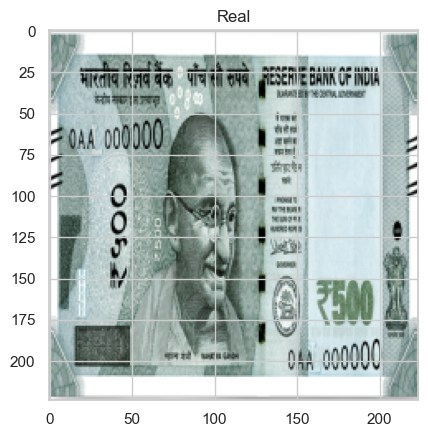

In [31]:
plt.imshow(images[86])
plt.title(class_names[86])

Text(0.5, 1.0, 'Real')

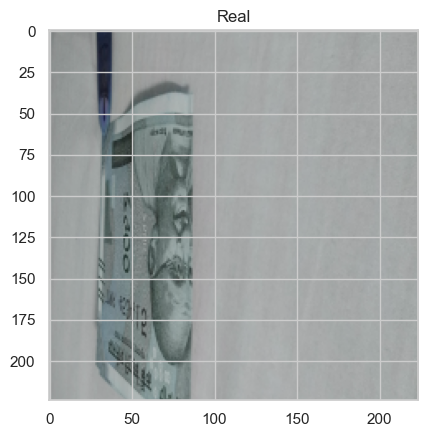

In [32]:
plt.imshow(images[188])
plt.title(class_names[188])

In [33]:
images = np.array(images)

In [34]:
images.shape

(400, 224, 224, 3)

In [35]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the target variable
y= label_encoder.fit_transform(data['class_label'])

In [36]:
# from sklearn.preprocessing import LabelBinarizer
# enc = LabelBinarizer()
# y = enc.fit_transform(data['class_label'])

In [37]:
label_encoder.classes_

array(['Fake', 'Real'], dtype=object)

In [38]:
data['class_label'][1:10]

52     Real
92     Fake
38     Real
121    Fake
127    Real
41     Real
49     Fake
100    Fake
103    Real
Name: class_label, dtype: object

In [39]:
y[:10]

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1])

In [40]:
# y = []
# for i in data['class_label']:
#     if i == 'Non_Autistic':
#         k = [1, 0]
#         y.append(k)
#     else:
#         k = [0, 1]
#         y.append(k)

In [41]:
# y[:5]

In [42]:
y=np.array(y)
y

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,

In [43]:
x_train, x_test, y_train, y_test = train_test_split(images, y, test_size=0.3, stratify=y, random_state=43)

In [44]:
y_train[:5]

array([0, 1, 1, 1, 1])

In [45]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((280, 224, 224, 3), (280,), (120, 224, 224, 3), (120,))

In [46]:
# batch_size = None

# model = Sequential()

# model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
#                  activation ='relu', batch_input_shape = (batch_size,224, 224, 3)))


# model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.2))


# model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'))
# model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model.add(Dropout(0.3))

# model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'))
# model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model.add(Dropout(0.4))



# model.add(GlobalMaxPooling2D())
# model.add(Dense(256, activation = "relu"))
# model.add(Dropout(0.5))
# model.add(Dense(2, activation = "sigmoid"))
# model.summary()
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
         
# Flatten the output for the fully connected layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [47]:
opt = Adam(learning_rate=0.001)
optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [48]:
img, x_train, y_train

('C:\\Users\\ganes\\Music\\FAkE CURRNCY\\DATASET\\Fake Currency\\Training\\Real\\r9.jpg',
 array([[[[190, 188, 182],
          [170, 177, 177],
          [175, 184, 188],
          ...,
          [164, 177, 179],
          [160, 173, 177],
          [172, 181, 182]],
 
         [[180, 178, 172],
          [171, 178, 178],
          [182, 191, 194],
          ...,
          [158, 172, 173],
          [166, 179, 183],
          [187, 197, 197]],
 
         [[174, 171, 165],
          [170, 176, 176],
          [188, 196, 200],
          ...,
          [150, 165, 166],
          [175, 189, 194],
          [185, 197, 197]],
 
         ...,
 
         [[191, 188, 178],
          [168, 172, 164],
          [170, 190, 190],
          ...,
          [165, 178, 182],
          [162, 174, 179],
          [163, 176, 180]],
 
         [[196, 193, 183],
          [175, 178, 169],
          [178, 194, 194],
          ...,
          [158, 171, 168],
          [166, 178, 178],
          [168, 180, 178

In [49]:
his = model.fit(x_train, y_train, epochs=5, batch_size=25)

Epoch 1/5


ValueError: in user code:

    File "C:\Users\ganes\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\ganes\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ganes\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\ganes\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\ganes\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "C:\Users\ganes\anaconda3\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\ganes\anaconda3\Lib\site-packages\keras\src\losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\ganes\anaconda3\Lib\site-packages\keras\src\losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\ganes\anaconda3\Lib\site-packages\keras\src\losses.py", line 2532, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\ganes\anaconda3\Lib\site-packages\keras\src\backend.py", line 5822, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 2) vs (None, 1)).


In [ ]:
import tensorflow as tf

# Assuming y_train is your original labels
# Convert y_train to one-hot encoded format
y_train_one_hot = tf.one_hot(y_train, depth=2)

# Now, use the one-hot encoded labels for evaluation
score_1 = model.evaluate(x_train, y_train_one_hot, verbose=0)
print("Test Accuracy : ", score_1[1])

score_1 = model.evaluate(x_train, y_train, verbose=0)
print("Test Accuracy : ", score_1[1])

In [ ]:
score_1 = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy : ", score_1[1])

In [ ]:
results = pd.DataFrame(columns=['model', 'test_accuracy'])
new = ['CNN', score_1[1]]
results.loc[0] = new

In [ ]:
model.save('CNN_model.h5')

In [ ]:
results

In [ ]:
for i in range(20):
    plt.figure(figsize=(15, 15))
    plt.subplot(4, 5, i+1)
    pred = np.argmax(model.predict(np.array([x_train[i]]))[0])
    print(x_train[i])
    act = np.argmax(y_test[i])
    plt.title("Predicted Class : {}\n Actual Class : {}".format(enc.classes_[pred], enc.classes_[act]))
    plt.imshow(x_test[i])
act = np.argmax(y_test[i])
print("Predicted class : {}", format(enc.classes_[pred]))
print("Actual Class : {}", format(enc.classes_[act]))

plt.imshow(x_test[i])

In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
vgg = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [ ]:
vgg.trainable = False

In [ ]:
model_1 = Sequential()
model_1.add(vgg)
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(2, activation='softmax'))

In [ ]:
opt = Adam(lr=0.001)
optimizer = tf.keras.optimizers.legacy.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08)
model_1.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
his2= model_1.fit(x_train, y_train, epochs = 5, validation_data = (x_test,y_test),batch_size = 28)

In [ ]:
score_3 = model_1.evaluate(x_train, y_train, verbose=0)
print('train accuracy:', score_3[1])

In [ ]:
score_4 = model_1.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score_4[1])

In [ ]:
model.save('VGG_model.h5')

In [ ]:
for i in range(20):
  plt.figure(figsize=(15,15))
  plt.subplot(4,5,i+1)
  pred = np.argmax(model_1.predict(np.array([x_test[i]]))[0])
  act = np.argmax(y_test[i])
  plt.title("Predicted class: {}\n Actual class: {}".format(enc.classes_[pred],enc.classes_[act]))
  plt.imshow(x_test[i])

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(4,5,i+1)
pred = np.argmax(model_1.predict(np.array([x_test[0]]))[0])
act = np.argmax(y_test[0])
plt.title("Predicted class: {}\n Actual class: {}".format(enc.classes_[pred],enc.classes_[act]))
plt.imshow(x_test[0])

In [ ]:
results = pd.DataFrame(columns=['model', 'test_accuracy'])
new = ['CNN', score_1[1]]
results.loc[0] = new

In [ ]:
new = ['VGG', score_4[1]]
results.loc[1] = new

In [ ]:
results